# Classification Logestic Regression

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Dataset

#### We will use the Titanic dataset (available on Kaggle), where the goal is to predict survival on the Titanic. That is, on the basis of the features (explanatory variables) included in the dataset, we want to predict whether a particular person survived the Titanic shipwreck

In [6]:
titanic = pd.read_csv(r"C:\Users\asus\Documents\ML Lab\Dataset\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Survived: The target variable; whether the person survived the shipwreck (1) or did not survive the shipwreck (0); Pclass: The class the passenger was in on the ship (1, 2 or 3); SibSp: Number of siblings and spouses on the ship; Parch: Number of parents / children on the ship; Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton).

## Drop the features 

In [7]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Create categorical dummies for the embarkment ports

In [8]:
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


## Transform gender names to binaries

In [11]:
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

## Find missing values

In [8]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Replace missing values

In [9]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [10]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


## Train and Test

In [11]:
y = titanic.Survived.copy()
X = titanic.drop(['Survived'], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Logistic Regression Model

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/anjir29/anaconda3/envs/tf-gpu-2.4/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [14]:
y_pred = pd.Series(model.predict(X_test))

In [15]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
acc_log = metrics.accuracy_score(y_test, y_pred)

In [16]:
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [17]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8026905829596412
Precision: 0.75
Recall: 0.7142857142857143


Text(0.5, 15.0, 'Predicted')

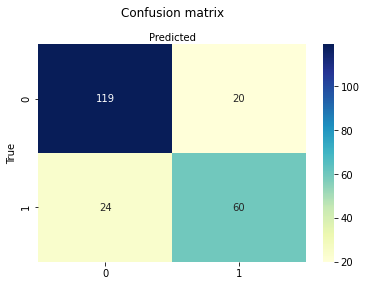

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Pros:

    Does not require high computation power;
    Easy to implement;
    Straightforward interpretability.

Cons:

    Vulnerable to overfitting;
    Cannot solve non-linear problems;
    Not able to handle a large number of categorical features.

# Classification KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#X_train, X_test, y_train, y_test

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7040358744394619
Precision: 0.6153846153846154
Recall: 0.5714285714285714


# Classification SVM

In [22]:
from sklearn.svm import SVC, LinearSVC

In [23]:
#X_train, X_test, y_train, y_test,y_pred

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = metrics.accuracy_score(y_test, y_pred)

/home/anjir29/anaconda3/envs/tf-gpu-2.4/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6636771300448431
Precision: 1.0
Recall: 0.10714285714285714


# Classification Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
#X_train, X_test, y_train, y_test,y_pred
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
y_pred = gaussian.predict(X_test)

acc_gaussian = metrics.accuracy_score(y_test, y_pred)

In [27]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8251121076233184
Precision: 0.7710843373493976
Recall: 0.7619047619047619


# Classification Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)

acc_decision = metrics.accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7937219730941704
Precision: 0.7261904761904762
Recall: 0.7261904761904762


In [1]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

NameError: name 'pd' is not defined

# Project:
1. Chose a Binary classification dataset and Predict with above algorithms
2. Add Perceptron,Random Forest, Stochastic Gradient Descent algorithms.
3. make a table or state which one is better for your dataset.
4. Viva. (Study simple Defination and Class lecture)